## [CM 1] 
>  -- KEVAL PRAJAPTI (20908584)

##  A) Iris Dataset

In [140]:
# AUTHOR : KEVAL PRAJAPATI
# AIM : DATA PRE-PROCESSING: FINDIND AND FILLING THE MISSING VALUES, DETECTING THE OUTLIERS, NORMALIZATION

# Importing necessary libraris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

# Importing the Iris dataset

iris_df = pd.read_csv('D:\COLLEGE\Waterloo\TERM 1\ECE 657A\Assignment 1\dataset\iris_dataset_missing.csv')



##### 1) Checking the basic statistics of the dataset


 Some basic stats about the data:


 Column Names:
  Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

 Length of the dataset:  105

 Data type of each feature: 
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

 Class labels:

['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']

 No. of samples belonging to each class label:

Iris-virginica     35
Iris-setosa        35
Iris-versicolor    35
Name: species, dtype: int64

 Minimum and Maximum values of each feature:

Sepal length range: [4.344007208198309, 7.795560938119888]
Sepal width range:  [1.9460099525749683, 4.409564795531333]
Petal length range: [1.0330307915806771, 6.768610590696335]
Petal width range:  [-0.0722025871276855, 2.603122520446777]


 Stats of the data:

       sepal_length  sepal_width  petal_length  petal_width
count    105.000000   101.000000     97.000000   105.00000

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

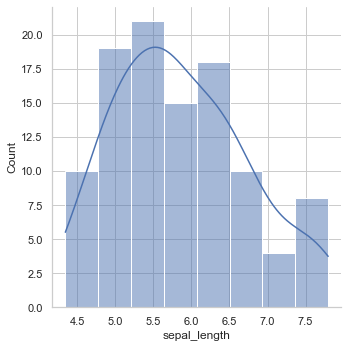

<Figure size 144x144 with 0 Axes>

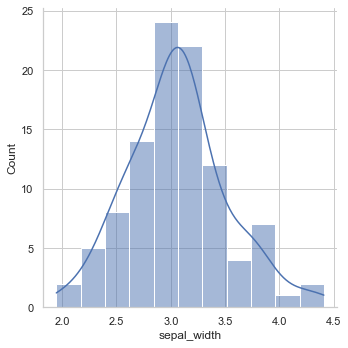

<Figure size 144x144 with 0 Axes>

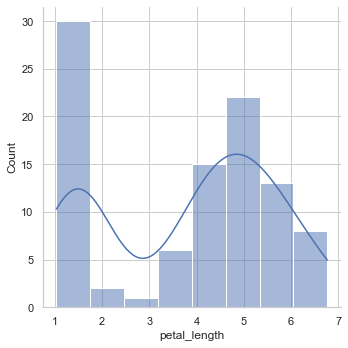

<Figure size 144x144 with 0 Axes>

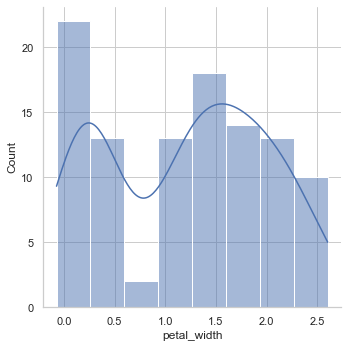

<Figure size 144x144 with 0 Axes>

In [141]:
print("\n Some basic stats about the data:\n")

# Displaying the column name
print("\n Column Names:\n ",iris_df.columns)

# Length of the dataset
print("\n Length of the dataset: ",len(iris_df))

# Data type of each column
print("\n Data type of each feature: \n", iris_df.dtypes)


# Class Labels in the dataset
print("\n Class labels:\n")
classes = list(iris_df['species'].unique())
print(classes)

# Checking for the class imbalance
print("\n No. of samples belonging to each class label:\n")
print(iris_df['species'].value_counts())

# Minimum and Maximum values of each feature
print("\n Minimum and Maximum values of each feature:\n")
print("Sepal length range: [%s, %s]" % (min(iris_df["sepal_length"]), max(iris_df["sepal_length"])))
print("Sepal width range:  [%s, %s]" % (min(iris_df["sepal_width"]), max(iris_df["sepal_width"])))
print("Petal length range: [%s, %s]" % (min(iris_df["petal_length"]), max(iris_df["petal_length"])))
print("Petal width range:  [%s, %s]\n" % (min(iris_df["petal_width"]), max(iris_df["petal_width"])))

# Describing the stats of the data
print("\n Stats of the data:\n")
print(iris_df.describe())



plt.figure(figsize=(2,2))
sns.displot(iris_df['sepal_length'], kde=True)
plt.figure(figsize=(2,2))
sns.displot(iris_df['sepal_width'], kde=True)
plt.figure(figsize=(2,2))
sns.displot(iris_df['petal_length'], kde=True)
plt.figure(figsize=(2,2))
sns.displot(iris_df['petal_width'], kde=True)
plt.figure(figsize=(2,2))

##### From the above result petal width might have some negative values since it has a negative number as min value which should  to be handled

##### 2) Handling the negative values
Negative values as good as no values hence replacing them NaN values

In [142]:
iris_df['petal_width'] = iris_df['petal_width'].mask(iris_df['petal_width'] < 0)

##### 3) Finding the missing values in the dataset and if yes then finding  the rows and column that have missing values

In [143]:
# Using isnull() function to find the missing values
print("\nNumber of missing values of each feature:\n ")
print(iris_df.isnull().sum()) 

print('\nTuples with  have missing values:\n')
nulls = iris_df[iris_df.isnull().any(axis=1)] 
print(nulls)


Number of missing values of each feature:
 
sepal_length    0
sepal_width     4
petal_length    8
petal_width     2
species         0
dtype: int64

Tuples with  have missing values:

    sepal_length  sepal_width  petal_length  petal_width          species
6       4.811740     3.037915      1.494268          NaN      Iris-setosa
7       5.205868          NaN      1.675654     0.112269      Iris-setosa
21      6.365979          NaN      4.964905     1.817211   Iris-virginica
30      5.673096     4.409565           NaN     0.370518      Iris-setosa
32      5.847160     2.743619           NaN     0.748681  Iris-versicolor
37      6.271780     2.521065           NaN     1.896626   Iris-virginica
39      5.040516     3.466344           NaN     0.314548      Iris-setosa
41      4.496342     3.098270           NaN     0.242853      Iris-setosa
50      5.817283     2.633800           NaN     1.141347  Iris-versicolor
54      6.265590          NaN      4.701306     1.290187  Iris-versicolor
64

#### 4) Handling the missing data:                                                                                                                                                                        
__i) Dropping the row:__                                                                                                              
This method involves deleting the row which has missing values but it is useful only when the row has many missing features like more than 75% of the features are missing in the row. But in given dataset it is not the case because as from the above result the rows have missing value of only one feature. So it will be a waste of other data available in the row if I delete the entire row for just missing a single value. Hence I am not dropping or deleting the row with missing values

__ii) Using Interpolation to fill in the missing values:__                                                              

df.interpolate() method fills in the value by estimating the missing data point with the help of 2 known data points (with the help of its neighbors). This method is suitable when we are working with time-series data where we can fill the missing values with the help neighbors because thery the data points have high correlation among each other like when if we have missing temperature value between 2 days then we can use  linear interpolation to fill in the missing value because it will try to fit the data between 2 known points. But in the given data set I haven't use interpolation because the data points or rows which are before and after the missing value have no any effect or dependency on the missing value and also it's not a time series data. Also they belong to different class as well. Hence using interpolation which just estimates the missing value based on the known value would not be a good or educated guess.

__iii) Forward fill and Backward fill:__

fillna() function allows to fill the missing values with forward fill and backward fill parameter where by the missing data is filled with the data (feature value) which is just above or below the missing data repectively. It is copying the value which is present in a row above or below the row with the missing value. This process is useful again when we are working with time-series data. Hence using forward or backward fill will not be a good or educated guess since the iris dataset is no time-series based dataset and also there is no interdependency among the rows or datapoints.   

__iv) Filling the missing values by group mean value:__

This method involves filling the mean value group wise rather than a column wise. For an example if we have dataset consisting of height, weight, age, gender and nationality and we have a missing value in height column and the person is idenified as American national than it would make more sense if we could put an average height of all the American in the data set by grouping rather than taking a avearge of height of people of other countries as well. Hence I have filled the missing value using group mean value.


In [144]:
# Grouping the data based on the class labels/ categories

IVC = iris_df.loc[iris_df['species'] == 'Iris-versicolor']
IS = iris_df.loc[iris_df['species'] == 'Iris-setosa']
IV = iris_df.loc[iris_df['species'] == 'Iris-virginica']


# IRIS-VERSICOLOR MEAN VALUES of sepal width, petal length, petal width
print("\n IRIS-VERSICOLOR MEAN VALUES\n")

IVC_sepal_width_mean = IVC['sepal_width'].mean()
print("\n IVC_sepal_width_mean",IVC_sepal_width_mean)

IVC_petal_length_mean = IVC['petal_length'].mean()
print("\n IVC_petal_length_mean",IVC_petal_length_mean)

IVC_petal_width_mean = IVC['petal_width'].mean()
print("\n IVC_petal_width_mean",IVC_petal_width_mean)


# Filling the column wise mean in place of missing values
IVC = IVC.fillna({
    'sepal_width': IVC_sepal_width_mean,
    'petal_length' : IVC_petal_length_mean,
    'petal_width' : IVC_petal_width_mean
})

# IRIS-SETOSA MEAN VALUES of sepal width, petal length, petal width

print("\n IRIS-SETOSA MEAN VALUES\n")

IS_sepal_width_mean = IS['sepal_width'].mean()
print("\n IS_sepal_width_mean",IS_sepal_width_mean)

IS_petal_length_mean = IS['petal_length'].mean()
print("\n IS_petal_length_mean",IS_petal_length_mean)

IS_petal_width_mean = IS['petal_width'].mean()
print("\n IVC_petal_width_mean",IS_petal_width_mean)

# Filling the column wise mean in place of missing values

IS = IS.fillna({
    'sepal_width': IS_sepal_width_mean,
    'petal_length' : IS_petal_length_mean,
    'petal_width' : IS_petal_width_mean
})


# IRIS-VIRGINICA MEAN VALUES of sepal width, petal length, petal width

print("\n IRIS-VIRGINICA MEAN VALUES\n")

IV_sepal_width_mean = IV['sepal_width'].mean()
print("\n IV_sepal_width_mean",IV_sepal_width_mean)

IV_petal_length_mean = IV['petal_length'].mean()
print("\n IV_petal_length_mean",IV_petal_length_mean)

IV_petal_width_mean = IV['petal_width'].mean()
print("\n IV_petal_width_mean",IV_petal_width_mean)

IV = IV.fillna({
    'sepal_width': IV_sepal_width_mean,
    'petal_length' : IV_petal_length_mean,
    'petal_width' : IV_petal_width_mean
})

# Concating the groups to a single and final data frame and sorting on the basis of index so that we can have original order of the rows
frames = [IVC,IS,IV]
clean_iris_df = pd.concat(frames)
clean_iris_df.sort_index(inplace = True)

# Saving the data frame as a check point
clean_iris_df.to_csv('D:\COLLEGE\Waterloo\TERM 1\ECE 657A\Assignment 1\dataset\iris_dataset_missing_filled_final.csv')

# After filling the missing values checking number of missing values
print("\nNumber of missing values of each feature after filling the missing values:\n ")
print(clean_iris_df.isnull().sum()) 


 IRIS-VERSICOLOR MEAN VALUES


 IVC_sepal_width_mean 2.759377363767249

 IVC_petal_length_mean 4.2831007114272905

 IVC_petal_width_mean 1.3085281170433984

 IRIS-SETOSA MEAN VALUES


 IS_sepal_width_mean 3.3835492409217878

 IS_petal_length_mean 1.4845170869724824

 IVC_petal_width_mean 0.2466398113408518

 IRIS-VIRGINICA MEAN VALUES


 IV_sepal_width_mean 3.0255073866443976

 IV_petal_length_mean 5.654781098462262

 IV_petal_width_mean 2.061326065602313

Number of missing values of each feature after filling the missing values:
 
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


#### 5) Outlier detection: 
Outliers are those values which differ significanlty from the given distribution. Many a times the outliers reveal some special or interesting pattern  but in given datasets the outlier detected doesn't show any significant pattern hence it's better to drop them.

<AxesSubplot:>

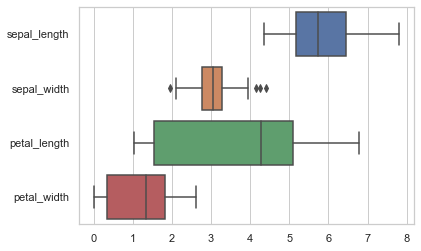

In [145]:
# Outlier detection using boxplot method
sns.set_theme(style='whitegrid')
sns.boxplot(data = clean_iris_df, orient = 'h')

From the above figure one can observe that sepal_width has 4 outliers 

In [147]:
# Outlier detection using IQR method
def outliers_det(df, feature, val=0, drop=False, replace=False):
    Q1_value = df[feature].quantile(0.25)
    Q3_value = df[feature].quantile(0.75)
    IQR_value = Q3_value - Q1_value
    border = IQR_value*1.5 
    
    Outliers = (df[feature] < Q1_value-border) | (df[feature] > Q3_value+border)
    Outliers = Outliers.tolist()
    Outliers_index = np.where(Outliers)[0]
    print("\n No of Ouliers in ", feature,":\t", len(Outliers_index))
    print("\n Feature name: \t\t",feature,"\n No. of Outliers: \t", len(Outliers_index), "\n Total instances \t: ",len(df[feature]))
    print("\n Outlier Index\t\t Outlier Value")
    for i in Outliers_index:
        print("\n",i,"\t\t\t", round(df[feature].iloc[i],3))
        df.drop(df.index[i], inplace=True)
    return df

for i in ['sepal_width', 'petal_width','petal_length']:
    outliers_det(clean_iris_df, i)
print("\n After",len(clean_iris_df))


 No of Ouliers in  sepal_width :	 3

 Feature name: 		 sepal_width 
 No. of Outliers: 	 3 
 Total instances 	:  102

 Outlier Index		 Outlier Value

 71 			 4.145

 84 			 3.147

 99 			 3.056

 No of Ouliers in  petal_width :	 0

 Feature name: 		 petal_width 
 No. of Outliers: 	 0 
 Total instances 	:  99

 Outlier Index		 Outlier Value

 No of Ouliers in  petal_length :	 0

 Feature name: 		 petal_length 
 No. of Outliers: 	 0 
 Total instances 	:  99

 Outlier Index		 Outlier Value

 After 99


#### 6) Min- Max Normalization

In [148]:
iris_df_mm = clean_iris_df.copy()
min_max_scaler = MinMaxScaler()
iris_df_mm.iloc[:,[0,1,2,3]] = min_max_scaler.fit_transform(iris_df_mm.iloc[:,[0,1,2,3]])
print("\n Min Max Normalization\n")
iris_df_mm.to_csv('D:\COLLEGE\Waterloo\TERM 1\ECE 657A\Assignment 1\dataset\iris_min_max_final.csv')
iris_df_mm.head()


 Min Max Normalization



,sepal_length,sepal_width,petal_length,petal_width,species
0,0.203115,0.244092,0.346084,0.443075,Iris-versicolor
1,0.574092,0.073581,0.611799,0.539391,Iris-versicolor
2,0.264660,0.811173,0.076301,0.145066,Iris-setosa
3,0.675395,0.545194,0.828588,0.906924,Iris-virginica
4,0.362512,0.317886,0.530848,0.522204,Iris-versicolor


##### 7) Standardization 

In [149]:
iris_df_zc = clean_iris_df.copy()
std_scaler = StandardScaler()
iris_df_zc.iloc[:, [0, 1, 2, 3]] = std_scaler.fit_transform(iris_df_zc.iloc[:, [0, 1, 2, 3]])
iris_df_mm.to_csv('D:\COLLEGE\Waterloo\TERM 1\ECE 657A\Assignment 1\dataset\iris_zc_final.csv')
print("\n Standarization\n")
iris_df_zc.head()



 Standarization



,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.949653,-1.234591,-0.453792,-0.055173,Iris-versicolor
1,0.553078,-2.159720,0.408248,0.270181,Iris-versicolor
2,-0.700349,1.842169,-1.329030,-1.061840,Iris-setosa
3,0.963429,0.399069,1.111560,1.511697,Iris-virginica
4,-0.303978,-0.834212,0.145624,0.212122,Iris-versicolor


##### 8) Comparing the dataset Normal v/s Min-Max Normalized v/s Standardized using validation set

During the comparison I haven't found any changes in results the reason being normalization in mainly used to scale the features when they have very different units of measure which might produce different results when comparsion is done using distance base metric like euclidean or manhattan distance. For an example when we have feature like age and salary they might have very different range of values and it is more likely that salary may have greater weight in distance based metric and hence produce biased results. So these types of features are needed to be scaled or normalized between some range like [0,1] or [-1,1]. Now in given iris dataset all the features have same unit of measure and have very similar ranges hence even after normalization there is no any change in accuracy from un-normalized data. 
Here in this particular case,  I prefer using normalized data over standardized data since we are asked to use KNN classifier and it does not make any assumption about the distribution since distribution of the couple of features is not Gaussian.  


 Stats of  Iris missing filled data

 Size of training set : Features =  (80, 4)  Labels =  (80,)

 Size of testing set : Features =  (10, 4)  Labels =  (10,)

 Size of validation set : Features =  (9, 4)  Labels =  (9,)

 Accuracy of Model on Validation dataset after training: 88.88888888888889

 Classification_report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.67      1.00      0.80         2
 Iris-virginica       1.00      0.50      0.67         2

       accuracy                           0.89         9
      macro avg       0.89      0.83      0.82         9
   weighted avg       0.93      0.89      0.88         9


 Confusion matrix:
[[5 0 0]
 [0 2 0]
 [0 1 1]]

 Stats of  Iris Min-Max Normalized data

 Size of training set : Features =  (80, 4)  Labels =  (80,)

 Size of testing set : Features =  (10, 4)  Labels =  (10,)

 Size of validation set : Features =  (9, 4)  Labels =  (9,)



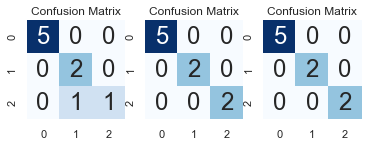

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_curve, roc_auc_score,f1_score, classification_report,plot_roc_curve

com = [clean_iris_df,iris_df_mm,iris_df_zc]
data_n = ['Iris missing filled data', 'Iris Min-Max Normalized data','Iris Standardised data']


# Splitting the data set into features and lables
j=0
cm = []
for i in com:
    print("\n Stats of ", data_n[j])
    X = i.iloc[:,:-1].values  # features
    y = i.iloc[:,4].values   # lables
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 98) # Train test split
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=98) # Train validation split

    print("\n Size of training set : Features = ", X_train.shape, " Labels = ", y_train.shape)
    print("\n Size of testing set : Features = ", X_test.shape, " Labels = ", y_test.shape)
    print("\n Size of validation set : Features = ", X_val.shape, " Labels = ", y_val.shape)

    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
        
    y_pred_v = knn.predict(X_val)
    accuracy_v = accuracy_score(y_val, y_pred_v)*100
    print("\n Accuracy of Model on Validation dataset after training:", accuracy_v )
    
    print('\n Classification_report:')
    print(classification_report(y_val, y_pred_v))
    print('\n Confusion matrix:')
    cm.append (confusion_matrix(y_val, y_pred_v))
    print(confusion_matrix(y_val, y_pred_v))
    j=j+1

print("\n Confusion Matrix")
m = 0
for i in cm:
    plt.subplot(2,3,m+1)
    plt.title("Confusion Matrix")
    sns.heatmap(i,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
    m=m+1
 

### B) Heart Disease dataset

In [91]:
# Importing the heart disease dataset
hd_df = pd.read_csv('D:\COLLEGE\Waterloo\TERM 1\ECE 657A\Assignment 1\dataset\heart_disease_missing.csv')


##### 1) Checking basic statistics of the dataset 


 Some basic stats about the data:


 Column Names:
  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

 Length of the dataset:  212

 Class labels:

[1, 0]

 No. of samples belonging to each class label:

1    115
0     97
Name: target, dtype: int64

Number of missing values of each feature:
 
age          0
sex          0
cp           0
trestbps     7
chol        10
fbs          0
restecg      5
thalach      4
exang        0
oldpeak     12
slope        2
ca           0
thal         1
target       0
dtype: int64

 Stats of the data:

              age         sex          cp    trestbps        chol         fbs  \
count  212.000000  212.000000  212.000000  205.000000  202.000000  212.000000   
mean    54.311321    0.688679    0.957547  131.784610  244.133256    0.132075   
std      9.145339    0.464130    1.022537   18.057222   46.444257    0.339374   
min     29.000000    0.00

<Figure size 144x144 with 0 Axes>

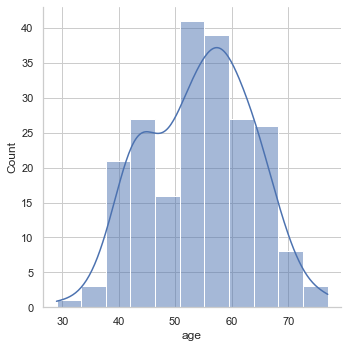

<Figure size 144x144 with 0 Axes>

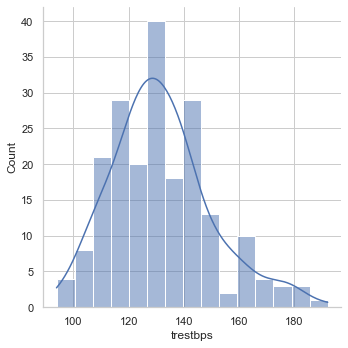

<Figure size 144x144 with 0 Axes>

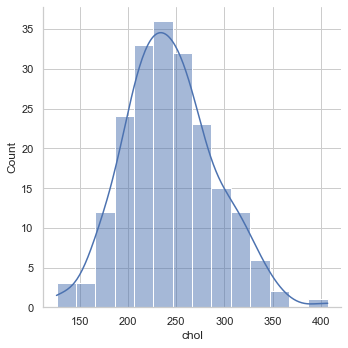

<Figure size 144x144 with 0 Axes>

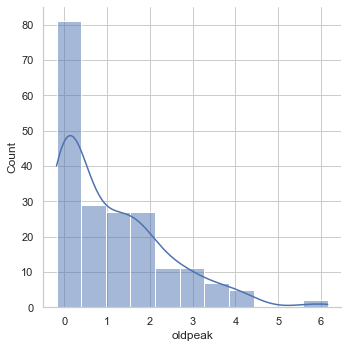

<Figure size 144x144 with 0 Axes>

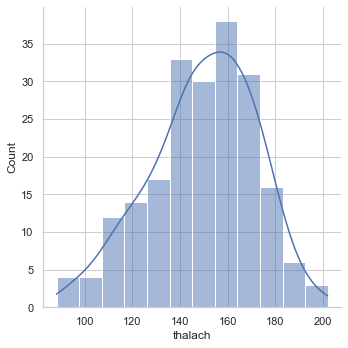

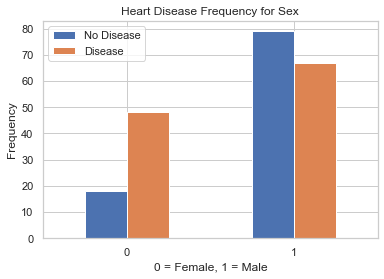

In [92]:
print("\n Some basic stats about the data:\n")

# Displaying the column name
print("\n Column Names:\n ",hd_df.columns)

# Length of the dataset
print("\n Length of the dataset: ",len(hd_df))


# Class Labels in the dataset
print("\n Class labels:\n")
classes = list(hd_df['target'].unique())
print(classes)

# Checking for the class imbalance
print("\n No. of samples belonging to each class label:\n")
print(hd_df['target'].value_counts())

# Number of missing values in each feature
print("\nNumber of missing values of each feature:\n ")
print(hd_df.isnull().sum()) 

# Describing the stats of the data
print("\n Stats of the data:\n")
print(hd_df.describe())

# Graphs of Numeric features 
plt.figure(figsize=(2,2))
sns.displot(hd_df['age'], kde=True)
plt.figure(figsize=(2,2))
sns.displot(hd_df['trestbps'], kde=True)
plt.figure(figsize=(2,2))
sns.displot(hd_df['chol'], kde=True)
plt.figure(figsize=(2,2))
sns.displot(hd_df['oldpeak'], kde=True)
plt.figure(figsize=(2,2))
sns.displot(hd_df['thalach'], kde=True)

# Frequecy of disease based on gender
pd.crosstab(hd_df.sex,hd_df.target).plot(kind="bar")
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = Female, 1 = Male')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()



##### From the above result oldpeak might have some negative values since it has a negative number as min value which should  to be handled

#### 2) Finding the missing values in the dataset 

In [93]:
print("\nNumber of missing values of each feature:\n ")
print(hd_df.isnull().sum()) 


Number of missing values of each feature:
 
age          0
sex          0
cp           0
trestbps     7
chol        10
fbs          0
restecg      5
thalach      4
exang        0
oldpeak     12
slope        2
ca           0
thal         1
target       0
dtype: int64


#### 3) Handling the missing values:

i) Handling the categorical missing data:

Now the we have:

a) __restecg__ : It represents resting electrocardiographic results and have following categories
- 0 = normal
- 1 = having ST-T wave abnormality
- 2 = left ventricular hyperthrophy                                                                                          <br>Since these are categorical values I am filling the missing value as the one which are most occuring in the restecg column. Hence filling the missing values using mode.


b) __slope__ : It represents peak exercise ST segment and have following categories
- 0 = Downsloping
- 1 = Upsloping
- 2 = Flat<br>                                                                                                                    Since these are categorical values I am filling the missing value as the one which are most occuring in the slope column. Hence filling the missing values using mode.

c) __thal__ : It represent Thalassemia and have following categories
- 0 = NA
- 1 = Fixed defect
- 2 = Normal
- 3 = Reversible defect<br>

Here the problem with __thal__ values is that they are categorical and the given dataset have floating point values. So first I have converted the values of __thal__ feature to categorical by replacing the range of values by a particular category and then filled the missing data with mode.

ii) Handling the numerical missing values

Now we have

a) __testbps__ : It represents resting blood pressure value.<br>
- Now it has 7 missing values. Filling the missing value of this feature by median value of the __trestbps__ because distribution of this feature is bit skewed after referring the plot of __trestbps__ above.

b) __oldpeak__ : It represents ST depression induced by exercise relative to rest.<br>
- Now it has 12 missing values. Filling the missing value of this feature by median value of the __oldpeak__ because distribution of this feature is bit skewed after referring the plot of __oldpeak__ above.

c) __chol__ : It represents serum cholesterol<br>
- Now it has 1o missing values. Filling the missing value of this feature by mean value of the __chol__ because distribution of this feature is not skewed after referring the plot of __chol__ above.

d) __thalach__ : It represents displays the max heart rate achieved.<br>
- Now it has 4 missing values. Filling the missing value of this feature by mean value of the __thalach__ because distribution of this feature is not skewed after referring the plot of __thalach__ above.



In [119]:
# Handling missing values of categorical features

# Filling the missing restecg values by the mode value of restecg
hd_df['restecg'] = hd_df['restecg'].fillna(hd_df['restecg'].mode()[0])

# Filling the missing slope values by the mode value of slope
hd_df['slope'] = hd_df['slope'].fillna(hd_df['slope'].mode()[0])


# Converting the thal values from floating point value to categorical by assigning the range of values a category

hd_df['thal'] = np.where(hd_df['thal'].between(0,0.50), 0, hd_df['thal'])
hd_df['thal'] = np.where(hd_df['thal'].between(0.51,0.99), 1, hd_df['thal'])
hd_df['thal'] = np.where(hd_df['thal'].between(0.99,1.5), 1, hd_df['thal'])
hd_df['thal'] = np.where(hd_df['thal'].between(1.51,1.99), 2, hd_df['thal'])
hd_df['thal'] = np.where(hd_df['thal'].between(1.99,2.50), 2, hd_df['thal'])
hd_df['thal'] = np.where(hd_df['thal'].between(2.51,2.99), 3, hd_df['thal'])
hd_df['thal'] = np.where(hd_df['thal'].between(2.99,3.50), 3, hd_df['thal'])

# Filling the missing thal values by the mode value of thal
hd_df['thal'] = hd_df['thal'].fillna(hd_df['thal'].mode()[0])

# Filling in the missing values for numerical features as per skew distribution or not
hd_df = hd_df.fillna({
    'trestbps': hd_df['trestbps'].median(),
    'oldpeak': hd_df['oldpeak'].median(),
    'chol': hd_df['chol'].mean(),
    'thalach': hd_df['thalach'].mean()
})



##### 4) Handling the negative values of old peak and rounding off the values of numeric features
i) Handling the negative __oldpeak__ values: <br>
> Negative values are as good as NaN values and won't help in detecting any pattern or improving the results. When observed carefully the negative __oldpeak__ values are very close to zero. Hence I have replaced these values with 0

ii) Rounding off the numeric features:<br>
> When one goes through the dataset it is observed that the values of the most of the numeric features can be easily rounded off to the nearest decimal value which facilitates meaningful analysis and data interpretation. Hence making data look more tidy and easy to interpret 

In [120]:
# Handling oldpeak values even negative by rounding off 
hd_df['oldpeak'] = hd_df['oldpeak'].round(2)
hd_df['oldpeak'] = np.where(hd_df['oldpeak'].between(-0.90,0), 0, hd_df['oldpeak'])

# Rounding off the trestbpd, chol, thalach
hd_df['trestbps'] = hd_df['trestbps'].round()
hd_df['chol'] = hd_df['chol'].round()
hd_df['thalach'] = hd_df['thalach'].round()



##### 5) Handling the problem of the datatype of certain features

In [121]:
# Data types of each column 
print("\n Data type of each feature:\n")
print(hd_df.dtypes)


 Data type of each feature:

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg     float64
thalach     float64
exang         int64
oldpeak     float64
slope       float64
ca            int64
thal        float64
target        int64
dtype: object


- Now when one observes the data type of each feature,  the data type of __restecg__ is denoted as float64 but the __restecg__ is a categorical data as discussed above. So converting it integer data type.

- Similarly the data type of __slope__ feature is float64 eventhough it's categorical as discussed above. So converting it to integer data type.

- Same goes for __thal__ feature

In [122]:
# Changing data type of restecg from float 64 to int64
hd_df['restecg'] = hd_df['restecg'].astype('int64')

# Changing data type of Slope from float 64 to int64
hd_df['slope'] = hd_df['slope'].astype('int64')

# Changing data type of thal from float 64 to int64
hd_df['thal'] = hd_df['thal'].astype('int64')
print("\n Data type of each feature:\n")
print(hd_df.dtypes)


 Data type of each feature:

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


##### 5) General statistics of data  a(fter handling the missing values) by dividing the data into numerical, ordinal, numeric and binary features

In [123]:
# As per given info. in about the type of feature (binary, numerical,)
bins = ['sex', 'fbs', 'exang']
cat = ['cp', 'restecg', 'slope','thal']
ords = ['ca']
nums = ['age', 'oldpeak', 'trestbps', 'chol', 'thalach']
target = ['target']


# Binary features general stats
print("\n Binary features general stats:")
print("\n Feature Name \t No. of unique class values \t Actual values")
for i in bins:
    print("\n",i,"\t\t\t",hd_df[i].nunique(),"\t\t\t",hd_df[i].unique())

print("\n Number of instances of belonging to each binary class")
for i in bins:
    print("\n",i,"\n",hd_df[i].value_counts())
    
    
# Categorical features general stats
print("\n Categorical features general stats:")
print("\n Feature Name \t No. of unique class values \t Actual values")
for i in cat:
    print("\n",i,"\t\t\t",hd_df[i].nunique(),"\t\t\t",hd_df[i].unique())

print("\n Number of instances of belonging to each category")
for i in cat:
    print("\n",i,"\n",hd_df[i].value_counts())
    
# Ordinal features general stats
print("\n Ordinal features general stats:")
print("\n Feature Name \t No. of unique class values \t Actual values")
print("\n ca","\t\t\t",hd_df['ca'].nunique(),"\t\t\t",hd_df['ca'].unique())

print("\n Number of instances of belonging to each ordinal class")
print("\n",i,"\n",hd_df['ca'].value_counts())

# Numerical features general stats
print("\n Numerical features general stats:")
for i in nums:
    print("\n Feature: ",i,"\n Min",round(hd_df[i].min(),3),"\n Max",round(hd_df[i].max(),3),"\n Mean",round(hd_df[i].mean(),3))



 Binary features general stats:

 Feature Name 	 No. of unique class values 	 Actual values

 sex 			 2 			 [0 1]

 fbs 			 2 			 [0 1]

 exang 			 2 			 [0 1]

 Number of instances of belonging to each binary class

 sex 
 1    146
0     66
Name: sex, dtype: int64

 fbs 
 0    184
1     28
Name: fbs, dtype: int64

 exang 
 0    139
1     73
Name: exang, dtype: int64

 Categorical features general stats:

 Feature Name 	 No. of unique class values 	 Actual values

 cp 			 4 			 [2 0 1 3]

 restecg 			 3 			 [2 0 1]

 slope 			 3 			 [1 2 0]

 thal 			 3 			 [2 3 1]

 Number of instances of belonging to each category

 cp 
 0    101
2     64
1     33
3     14
Name: cp, dtype: int64

 restecg 
 1    113
0     95
2      4
Name: restecg, dtype: int64

 slope 
 2    106
1     91
0     15
Name: slope, dtype: int64

 thal 
 2    113
3     87
1     12
Name: thal, dtype: int64

 Ordinal features general stats:

 Feature Name 	 No. of unique class values 	 Actual values

 ca 			 5 			 [0 1 2 3 

##### 7) Outlier detection

<AxesSubplot:ylabel='thalach'>

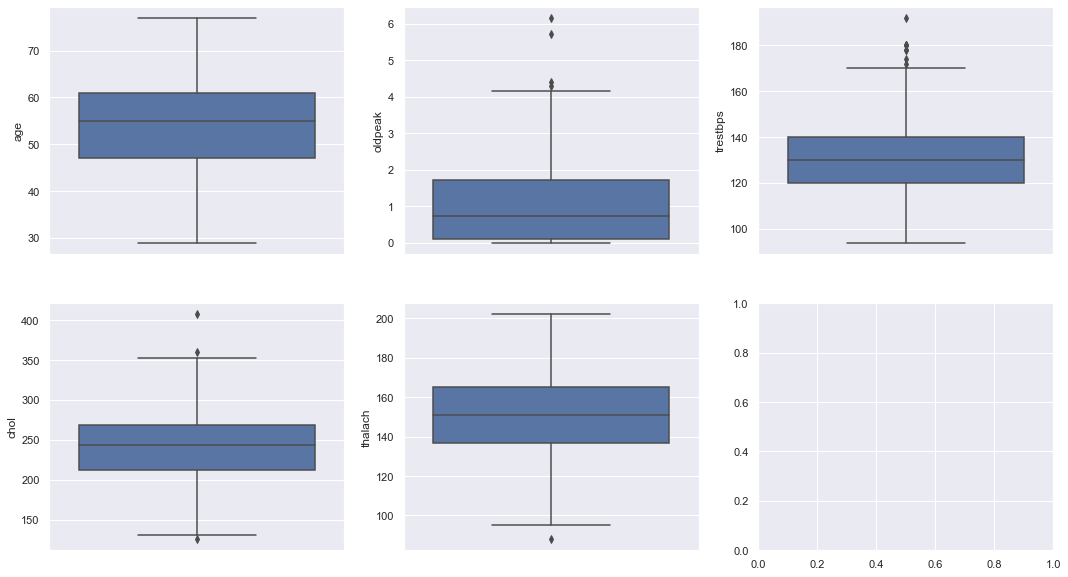

In [124]:
sns.set()
fig, axes = plt.subplots(2, 3,  figsize=(18, 10))
sns.set_theme(style='whitegrid')
sns.boxplot(ax=axes[0, 0], data=hd_df, y = 'age')
sns.boxplot(ax=axes[0, 1], data=hd_df, y = 'oldpeak')
sns.boxplot(ax=axes[0, 2], data=hd_df, y = 'trestbps')
sns.boxplot(ax=axes[1, 0], data=hd_df, y = 'chol')
sns.boxplot(ax=axes[1, 1], data=hd_df, y = 'thalach')


##### After obeserving above box plots one can see that feature, oldpeak, trestbps, chol and thalach has outliers

In [127]:
# Outlier detection using IQR method

def outliers_det(df, feature, val=0, drop=False, replace=False):
    Q1_value = df[feature].quantile(0.25)
    Q3_value = df[feature].quantile(0.75)
    IQR_value = Q3_value - Q1_value
    border = IQR_value*1.5 
    
    Outliers = (df[feature] < Q1_value-border) | (df[feature] > Q3_value+border)
    Outliers = Outliers.tolist()
    Outliers_index = np.where(Outliers)[0]
    
    print("\n Feature name: \t",feature,"\n  No. of Outliers: \t", len(Outliers_index), "\n Total instances \t: ",len(Outliers))
    print("\n Outlier Index\t\t Outlier Value")
    for i in Outliers_index:
        print("\n",i,"\t\t\t", round(df[feature].iloc[i],3))
    
    print('\nRemoving outliers of: ', feature)
    for i in Outliers_index:
        df.drop(df.index[i],inplace = True)
    
    return df


for i in ['trestbps', 'chol', 'thalach', 'oldpeak']:
    outliers_det(hd_df, i)
    
# Saving a data frame as a check point   
clean_hd_df = hd_df
clean_hd_df.to_csv('D:\COLLEGE\Waterloo\TERM 1\ECE 657A\Assignment 1\dataset\heart_disease_missing_filled_final.csv')



 Feature name: 	 trestbps 
  No. of Outliers: 	 8 
 Total instances 	:  212

 Outlier Index		 Outlier Value

 45 			 172.0

 57 			 178.0

 65 			 178.0

 87 			 180.0

 100 			 192.0

 134 			 174.0

 145 			 180.0

 198 			 180.0

Removing outliers of:  trestbps

 Feature name: 	 chol 
  No. of Outliers: 	 4 
 Total instances 	:  204

 Outlier Index		 Outlier Value

 82 			 126.0

 132 			 131.0

 179 			 407.0

 195 			 360.0

Removing outliers of:  chol

 Feature name: 	 thalach 
  No. of Outliers: 	 1 
 Total instances 	:  200

 Outlier Index		 Outlier Value

 35 			 88.0

Removing outliers of:  thalach

 Feature name: 	 oldpeak 
  No. of Outliers: 	 3 
 Total instances 	:  199

 Outlier Index		 Outlier Value

 14 			 4.28

 123 			 5.71

 161 			 6.16

Removing outliers of:  oldpeak


##### 8) Min - Max Normalization


In [131]:
hd_df_mm = clean_hd_df.copy()
min_max_scaler = MinMaxScaler()
hd_df_mm.iloc[:,[0,3,4,5,7,8,9]]= min_max_scaler.fit_transform(hd_df_mm.iloc[:,[0,3,4,5,7,8,9]])
hd_df_mm.to_csv('D:\COLLEGE\Waterloo\TERM 1\ECE 657A\Assignment 1\dataset\heart_disease_missing_filled_min_max_final.csv')
hd_df_mm.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.979167,0,2,0.469388,0.239130,0.0,2,0.196262,0.0,0.207792,1,0,2,1
1,0.291667,0,0,0.387755,0.760870,1.0,0,0.383178,1.0,0.504870,1,0,3,0
2,0.375000,1,2,0.142857,0.405797,0.0,1,0.532710,0.0,0.000000,2,0,2,0
3,0.458333,1,2,0.061224,0.409420,0.0,1,0.448598,1.0,0.194805,1,0,2,1
4,0.583333,1,0,0.163265,0.739130,0.0,1,0.448598,1.0,0.500000,1,1,3,0


##### 9) Standardization

In [132]:
hd_df_zc = clean_hd_df.copy()
std_scaler = StandardScaler()
hd_df_zc.iloc[:, [0,3,4,5,7,8,9]] = std_scaler.fit_transform(hd_df_zc.iloc[:, [0,3,4,5,7,8,9]])
hd_df_zc.to_csv('D:\COLLEGE\Waterloo\TERM 1\ECE 657A\Assignment 1\dataset\heart_disease_missing_filled_zc_final.csv')
hd_df_zc.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,2.367566,0,2,0.502063,-1.062751,-0.364620,2,-1.598182,-0.704403,0.180389,1,0,2,1
1,-1.201995,0,0,0.046751,2.140141,2.742579,0,-0.671288,1.419642,1.729763,1,0,3,0
2,-0.769321,1,2,-1.319185,-0.039605,-0.364620,1,0.070226,-0.704403,-0.903327,2,0,2,0
3,-0.336647,1,2,-1.774497,-0.017363,-0.364620,1,-0.346876,1.419642,0.112657,1,0,2,1
4,0.312364,1,0,-1.205357,2.006687,-0.364620,1,-0.346876,1.419642,1.704364,1,1,3,0


##### 8) Comparing the dataset Normal v/s Min-Max Normalized v/s Standardized using validation set

After training the model on normal, min-max and standardized dataset it is clear that the accuracy score is highest when I have used min-max normalized and standardized data. The reason for that is the data contains various numeric features like age, trestbps, chol, fbs, thalach, exang and oldpeak who have varying ranges and unit of measures due to this the distance based classifier like KNN tends to give some features greater weight over others. Hence the normalized data helps in avoiding dependence on measurement units thus producing better results.  



 Stats of  Heart Disease missing filled data

 Size of training set : Features =  (158, 13)  Labels =  (158,)

 Size of testing set : Features =  (20, 13)  Labels =  (20,)

 Size of validation set : Features =  (18, 13)  Labels =  (18,)

 Accuracy of Model on Validation dataset after training: 27.77777777777778

 Classification_report:
              precision    recall  f1-score   support

           0       0.25      0.22      0.24         9
           1       0.30      0.33      0.32         9

    accuracy                           0.28        18
   macro avg       0.28      0.28      0.28        18
weighted avg       0.27      0.28      0.28        18


 Confusion matrix:
[[2 7]
 [6 3]]

 Stats of  Heart Disease Min-Max Normalized data

 Size of training set : Features =  (158, 13)  Labels =  (158,)

 Size of testing set : Features =  (20, 13)  Labels =  (20,)

 Size of validation set : Features =  (18, 13)  Labels =  (18,)

 Accuracy of Model on Validation dataset after training:

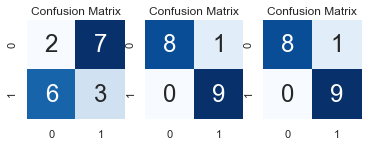

In [139]:

hd_df_mm = pd.read_csv('D:\COLLEGE\Waterloo\TERM 1\ECE 657A\Assignment 1\dataset\heart_disease_missing_filled_min_max_final.csv')
hd_df_zc = pd.read_csv('D:\COLLEGE\Waterloo\TERM 1\ECE 657A\Assignment 1\dataset\heart_disease_missing_filled_zc_final.csv')

com = [clean_hd_df,hd_df_mm,hd_df_zc]
data_n = ['Heart Disease missing filled data', 'Heart Disease Min-Max Normalized data','Heart Disease Standardised data']

# Splitting the data set into features and lables
j=0
cm = []
for i in com:
    print("\n Stats of ", data_n[j])
    X = i.iloc[:,:-1].values  # features
    y = i.iloc[:,13].values   # lables
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 98) # Train test split
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=98) # Train validation split

    print("\n Size of training set : Features = ", X_train.shape, " Labels = ", y_train.shape)
    print("\n Size of testing set : Features = ", X_test.shape, " Labels = ", y_test.shape)
    print("\n Size of validation set : Features = ", X_val.shape, " Labels = ", y_val.shape)

    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
        
    y_pred_v = knn.predict(X_val)
    accuracy_v = accuracy_score(y_val, y_pred_v)*100
    print("\n Accuracy of Model on Validation dataset after training:", accuracy_v )
    
    print('\n Classification_report:')
    print(classification_report(y_val, y_pred_v))
    print('\n Confusion matrix:')
    cm.append (confusion_matrix(y_val, y_pred_v))
    print(confusion_matrix(y_val, y_pred_v))
    j=j+1

print("\n Confusion Matrix")
m = 0
for i in cm:
    plt.subplot(2,3,m+1)
    plt.title("Confusion Matrix")
    sns.heatmap(i,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
    m=m+1
    